In [27]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
df=pd.read_csv('Further_clean_datasets/further_clean_all.csv')
df.head()

,created_at,user_id,username,tweet,place,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS)
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament covid vaccine days not weeks challe...,"['parliament', 'covid', 'vaccine', 'days', 'no...","['parliament', 'covid', 'vaccine', 'day', 'not...",parliament covid vaccine day not week challeng...,"[('parliament', 'n'), ('covid', 'n'), ('vaccin...",parliament covid vaccine day not week challe...
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,dose vaccination syringe combating covid,"['dose', 'vaccination', 'syringe', 'combating'...","['dose', 'vaccination', 'syringe', 'combating'...",dose vaccination syringe combating covid,"[('dose', 'a'), ('vaccination', 'n'), ('syring...",dose vaccination syringe combat covid
2,2021-01-06,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget covid brexit trump sleep listening...,"['time', 'forget', 'covid', 'brexit', 'trump',...","['time', 'forget', 'covid', 'brexit', 'trump',...",time forget covid brexit trump sleep listening...,"[('time', 'n'), ('forget', 'v'), ('covid', 'a'...",time forget covid brexit trump sleep listeni...
3,2021-01-06,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight program conti...,"['rachel', 'absolutely', 'nailed', 'tonight', ...","['rachel', 'absolutely', 'nailed', 'tonight', ...",rachel absolutely nailed tonight program conti...,"[('rachel', 'n'), ('absolutely', 'r'), ('naile...",rachel absolutely nailed tonight program con...
4,2021-01-06,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids not wana homework sparkles covid sparkles...,"['kids', 'not', 'wana', 'homework', 'sparkles'...","['kid', 'not', 'wana', 'homework', 'sparkle', ...",kid not wana homework sparkle covid sparkle ba...,"[('kids', 'n'), ('not', 'r'), ('wana', 'a'), (...",kid not wana homework sparkle covid sparkle ...


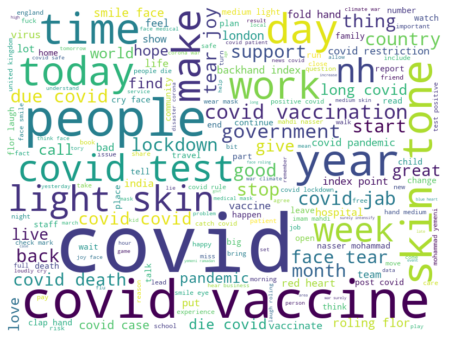

<Figure size 432x288 with 0 Axes>

In [35]:
#word cloud map
#https://www.datacamp.com/community/tutorials/wordcloud-python
def word_cloud(words):
    wordcloud = WordCloud(width=800, height=600, random_state=21, relative_scaling=0.5, background_color="white").generate(words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
word_set = ' '.join([tweet_word for tweet_word in df['lemma_sentence(with POS)']])
word_cloud(word_set)
plt.savefig('word_cloud.jpg')
#vaccine is a hot topic

In [15]:
df['lemma'].value_counts()[0:10]

['covid']                                                                                                                                                                                182
['disaster', 'corona', 'war', 'climate', 'war', 'surely', 'intensify', 'imam', 'mahdi', 'nasser', 'mohammad', 'yemeni', 'ramadan', 'coronandclimatewartragedy']                           68
['work', 'fernes', 'care', 'home', 'fareham', 'hard', 'challenging', 'time', 'covid', 'team', 'shout', 'video', 'eternally', 'grateful', 'boost', 'team', 'morale', 'worked', 'hard']     46
['covid', 'vaccine']                                                                                                                                                                      40
['calling', 'support', 'access', 'covid', 'vaccine', 'world', 'join']                                                                                                                     40
['coronandclimatewartragedy', 'disaster', 'corona', 'wa

In [23]:
#Word frequency
from nltk.tokenize import word_tokenize
from collections import Counter
from collections import Counter
texts = df['lemma_sentence(with POS)']
word_counts = Counter(word_tokenize('\n'.join(texts)))
word_top=word_counts.most_common(n=20)
print(word_top)
# count_sum=

[('covid', 79634), ('not', 25848), ('face', 12203), ('vaccine', 10694), ('people', 9332), ('test', 6392), ('no', 6370), ('day', 5669), ('year', 5089), ('time', 5029), ('work', 4808), ('death', 4256), ('today', 4184), ('make', 3963), ('hand', 3826), ('lockdown', 3678), ('vaccination', 3583), ('heart', 3530), ('back', 3419), ('skin', 3405)]


7416640


Text(0.5, 1.0, 'Word Frequency Chart')

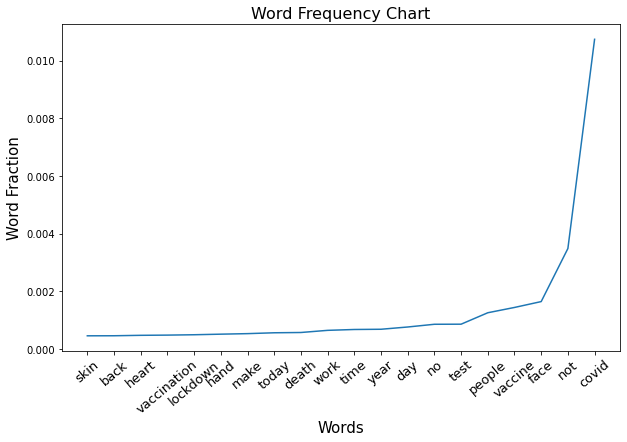

In [33]:
#(5)
count_all = df['lemma_sentence(with POS)'].str.len().sum()
print(count_all)

words=[count[0] for count in word_top]
frac_value=[int(count[1])/count_all for count in  word_top]
words=words[: :-1]
frac_value=sorted(frac_value)

#plot line chart
plt.figure(figsize=(10, 6))
plt.plot(words,frac_value)
plt.xticks(rotation=40, fontsize=13)
plt.xlabel('Words',fontsize=15)
plt.ylabel('Word Fraction',fontsize=15)
plt.title('Word Frequency Chart',fontsize=16)